# **Comparison of a sentiment analysis of the movie reviews using linear classifier and NN**

# Dataset

This is a dataset for binary sentiment classification. We provide a set of 50,000 highly polar movie reviews for training and testing.

# Imports

In [ ]:
import pandas as pd
import numpy as np

# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import re

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import gensim.downloader as api
import json

In [1]:
from bs4 import BeautifulSoup

In [ ]:
!pip install symspellpy
from symspellpy.symspellpy import SymSpell, Verbosity
import pkg_resources
import re, string, json, urllib
from tqdm.notebook import tqdm

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, regexp_tokenize, sent_tokenize

In [ ]:
print(cachedStopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from sklearn.feature_extraction import text
print(text.ENGLISH_STOP_WORDS)

frozenset({'herself', 'onto', 'hereupon', 'do', 'along', 'nowhere', 'most', 'nothing', 'several', 'either', 'someone', 'as', 'further', 'toward', 'about', 'eleven', 'at', 'still', 'move', 'becoming', 'find', 'off', 'thru', 'put', 'found', 'thus', 'very', 'meanwhile', 'was', 'amount', 'cannot', 'become', 'cry', 'six', 'around', 'ours', 'her', 'twenty', 'full', 'so', 'else', 'thereupon', 'amongst', 'mine', 'becomes', 'show', 'wherein', 'until', 'latterly', 'none', 'first', 'and', 'anyone', 'if', 'them', 'but', 'alone', 'cant', 'themselves', 'others', 'out', 'those', 'an', 'may', 'after', 'whereas', 'the', 'whence', 'give', 'can', 'already', 'therein', 'yourselves', 'whereafter', 'formerly', 'not', 'latter', 'neither', 'please', 'whoever', 'keep', 'many', 'moreover', 'often', 'might', 'mostly', 'though', 'herein', 'thence', 'third', 'whenever', 'anywhere', 'sincere', 'nevertheless', 'somewhere', 'top', 'although', 'upon', 'forty', 'afterwards', 'somehow', 'seeming', 'before', 'into', 'bil

In [ ]:
stop_words = ['in', 'of', 'at', 'a', 'the', 'be', 'and', 'to', 'it', 'that', 'this', 'with', 'for']

## sklearn

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, \
  RandomizedSearchCV, GridSearchCV, cross_validate, KFold
from sklearn.base import clone

from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, \
  CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, \
  OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn.calibration import CalibratedClassifierCV

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [ ]:

from gensim.corpora.dictionary import Dictionary
from gensim.models import Word2Vec
from itertools import chain
from collections import defaultdict

In [ ]:
!pip install textfeatures
import textfeatures as tfs

In [ ]:
import spacy
!pip install textstat
from textstat.textstat import textstatistics#,legacy_round

In [ ]:
  !pip install scikit-plot
  import scikitplot as skplt

In [ ]:
import os
from google.colab import drive

## TF

In [ ]:
!pip install -q --upgrade keras-nlp tensorflow
import keras_nlp
import tensorflow as tf
from tensorflow import keras

In [ ]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

batch_size = 8 * tpu_strategy.num_replicas_in_sync
print('Batch size:', batch_size)
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Read data

In [ ]:
gdrive_url = '/content/gdrive'
mydrive_url = os.path.join(gdrive_url, 'MyDrive')

In [ ]:
drive.mount(gdrive_url)
dataset_url = os.path.join(mydrive_url, 'datasets/LargeMovieReviewDataset.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv(dataset_url, true_values=['positive'], false_values=['negative'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 439.6+ KB


We can see thet there is mo missing data.

# EDA

## Response variable

In [ ]:
y = df.sentiment

In [ ]:
y.value_counts(normalize=True)

True     0.5
False    0.5
Name: sentiment, dtype: float64

We can see that the dataset is balanced

## Independent variable

In [ ]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

We can see here, that text needs cleaning

## Duplicates

In [ ]:
df.duplicated().sum()

418

In [ ]:
df.drop_duplicates(inplace=True)

# Preprocessing

## Removing HTML tags
Let's work for a while with the clean text without html tags and in lowercase

In [ ]:
df['raw'] = df.review.apply(lambda text: BeautifulSoup(text, 'html.parser').get_text().lower())
df.head()

,review,sentiment,raw
0,One of the other reviewers has mentioned that ...,True,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,True,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,True,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,False,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",True,"petter mattei's ""love in the time of money"" is..."


## Additional cleaning

Punctuations, URLs and duplicated whitespaces

In [ ]:
def simplify_punctuation_and_whitespace(text):

  text = _replace_urls(text)
  text = _simplify_punctuation(text)
  text = _normalize_whitespace(text)

  return text

def _replace_urls(text):
    url_regex = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    text = re.sub(url_regex, "<URL>", text)
    return text

def _simplify_punctuation(text):
    """
    This function simplifies doubled or more complex punctuation. The exception is '...'.
    """
    corrected = str(text)
    corrected = re.sub(r'([!?,;])\1+', r'\1', corrected)
    corrected = re.sub(r'\.{2,}', r'...', corrected)
    return corrected

def _normalize_whitespace(text):
    """
    This function normalizes whitespaces, removing duplicates.
    """
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")


## Contractions

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/Myoth13/datasets/main/contractions.json'
r = requests.get(url)
contraction_list = r.json()

def normalize_contractions(text):
  text = _normalize_contractions_text(text, contraction_list)
  return text

def _normalize_contractions_text(text, contractions):
  """
  This function normalizes english contractions.
  """
  new_token_list = []
  token_list = text.split()
  for word_pos in range(len(token_list)):
      word = token_list[word_pos]
      first_upper = False
      if word[0].isupper():
          first_upper = True
      if word.lower() in contractions:
          replacement = contractions[word.lower()]
          if first_upper:
              replacement = replacement[0].upper()+replacement[1:]
          replacement_tokens = replacement.split()
          if len(replacement_tokens)>1:
              new_token_list.append(replacement_tokens[0])
              new_token_list.append(replacement_tokens[1])
          else:
              new_token_list.append(replacement_tokens[0])
      else:
          new_token_list.append(word)
  sentence = " ".join(new_token_list).strip(" ")
  return sentence

## Spell correction

In [ ]:
max_edit_distance_dictionary= 3
prefix_length = 4
spellchecker = SymSpell(max_edit_distance_dictionary, prefix_length)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt")
spellchecker.load_dictionary(dictionary_path, term_index=0, count_index=1)
spellchecker.load_bigram_dictionary(dictionary_path, term_index=0, count_index=2)

def spell_correction(text):
  text = _spell_correction_text(text, spellchecker)
  return text

def _spell_correction_text(text, spellchecker):
    """
    This function does very simple spell correction normalization using pyspellchecker module. It works over a tokenized sentence and only the token representations are changed.
    """
    if len(text) < 1:
        return ""
    #Spell checker config
    max_edit_distance_lookup = 2
    suggestion_verbosity = Verbosity.TOP # TOP, CLOSEST, ALL
    #End of Spell checker config
    token_list = text.split()
    for word_pos in range(len(token_list)):
        word = token_list[word_pos]
        if word is None:
            token_list[word_pos] = ""
            continue
        if not '\n' in word and word not in string.punctuation and not is_numeric(word) and not (word.lower() in spellchecker.words.keys()):
            suggestions = spellchecker.lookup(word.lower(), suggestion_verbosity, max_edit_distance_lookup)
            #Checks first uppercase to conserve the case.
            upperfirst = word[0].isupper()
            #Checks for correction suggestions.
            if len(suggestions) > 0:
                correction = suggestions[0].term
                replacement = correction
            #We call our _reduce_exaggerations function if no suggestion is found. Maybe there are repeated chars.
            else:
                replacement = _reduce_exaggerations(word)
            #Takes the case back to the word.
            if upperfirst:
                replacement = replacement[0].upper()+replacement[1:]
            word = replacement
            token_list[word_pos] = word
    return " ".join(token_list).strip()

def _reduce_exaggerations(text):
    """
    Auxiliary function to help with exxagerated words.
    Examples:
        woooooords -> words
        yaaaaaaaaaaaaaaay -> yay
    """
    correction = str(text)
    #TODO work on complexity reduction.
    return re.sub(r'([\w])\1+', r'\1', correction)

def is_numeric(text):
    for char in text:
        if not (char in "0123456789" or char in ",%.$"):
            return False
    return True

## Lemmatization

Lemmatization for this dataset was quite fast, so I don't see the need for stemming instead of lemmatization (should be faster)

In [ ]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(text):
  text = _lemmatize_text(text, nlp).strip()
  return text

def _lemmatize_text(sentence, nlp):
    sent = ""
    doc = nlp(sentence)
    for token in doc:
        if '@' in token.text:
            sent+=" @MENTION"
        elif '#' in token.text:
            sent+= " #HASHTAG"
        else:
            sent+=" "+token.lemma_
    return sent

## Cleaning pipeline

In [ ]:
def normalization_pipeline(sentences):
    sentences = simplify_punctuation_and_whitespace(sentences)
    sentences = normalize_contractions(sentences)
    sentences = spell_correction(sentences)
    sentences = lemmatize(sentences)
    return sentences

In [ ]:
%%time
df['cleaned'] = df.raw.apply(lambda text: normalization_pipeline(text))

CPU times: user 1h 30min 46s, sys: 21.4 s, total: 1h 31min 7s
Wall time: 1h 31min 48s


In [ ]:
df.cleaned.head()

0    one of the other reviewer have mention that af...
1    a wonderful little production the film techniq...
2    I think this be a wonderful way to spend time ...
3    basically there have a family where a little b...
4    petter matter love in the time of money be a v...
Name: cleaned, dtype: object

## Tokenization

In [ ]:
# Tokenize the article: tokens
df['tokens'] = df.cleaned.apply(lambda text: word_tokenize(text))

df.tokens.head()

0    [one, of, the, other, reviewer, have, mention,...
1    [a, wonderful, little, production, the, film, ...
2    [I, think, this, be, a, wonderful, way, to, sp...
3    [basically, there, have, a, family, where, a, ...
4    [petter, matter, love, in, the, time, of, mone...
Name: tokens, dtype: object

## Removing stop words

I decided to use my small stop words list, because for sentiment analysis standard dictionaries can hurt performance

In [ ]:
df['tokens'] = df.tokens.apply(lambda list: [l for l in list if l not in stop_words])
df.tokens.head()

0    [one, other, reviewer, have, mention, after, w...
1    [wonderful, little, production, film, techniqu...
2    [I, think, wonderful, way, spend, time, on, to...
3    [basically, there, have, family, where, little...
4    [petter, matter, love, time, money, visually, ...
Name: tokens, dtype: object

## Words analysis

In [ ]:
def get_corpus_stat(tokens, top_n=10):
  result = []
  # Create a Dictionary from the articles: dictionary
  dictionary = Dictionary(tokens)

  # Create a MmCorpus: corpus
  corpus = [dictionary.doc2bow(article) for article in tokens]

  # Create the defaultdict: total_word_count
  total_word_count = defaultdict(int)
  for word_id, word_count in chain.from_iterable(corpus):
      total_word_count[word_id] += word_count

  # Create a sorted list from the defaultdict: sorted_word_count
  sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True)

  # Print the top 5 words across all documents alongside the count
  for word_id, word_count in sorted_word_count[:top_n]:
      result.append(tuple((dictionary.get(word_id), word_count)))

  return result


Let's see the stat for the positive reviews

In [ ]:
print(get_corpus_stat(df[df.sentiment==True].tokens, 15))

[('I', 87242), ('have', 68969), ('not', 56282), ('as', 50351), ('film', 49435), ('movie', 43855), ('he', 42385), ('-', 41517), ('do', 39955), ('but', 39831), ('his', 33434), ('on', 33415), ('you', 33092), ('one', 27509), ('they', 26767)]


Let's see the stat for the negative reviews

In [ ]:
print(get_corpus_stat(df[df.sentiment==False].tokens, 15))

[('I', 98555), ('have', 77288), ('not', 73527), ('movie', 56854), ('do', 49750), ('-', 43857), ('film', 43159), ('but', 41570), ('as', 39629), ('he', 35837), ('you', 34900), ('they', 33637), ('on', 33417), ('one', 26202), ('we', 25640)]


We can see that many top words are overlapped. So TfIdfVectorizer is mreferable option here

# Feature engineering

## Basic statistics

In [ ]:
df['len'] = df.review.apply(lambda text: len(text))
df['n_numbers'] = df.review.apply(lambda text: sum(c.isdigit() for c in text))
df['numbers_ratio'] = df.review.apply(lambda text: sum(c.isdigit() for c in text)\
                                   / len(text))
df['n_words'] = df.review.apply(lambda text: len(text.split()))
df['n_letters'] = df.review.apply(lambda text: sum(c.isalpha() for c in text))
df['n_spaces'] = df.review.apply(lambda text: sum(c.isspace() for c in text))
df['n_capitals'] = df.review.apply(lambda text: sum(c.isupper() for c in text))
df['capitals_ratio'] = df.review.apply(lambda text: sum(c.isupper() for c in text)\
                                    / len(text))



In [ ]:
tmp = tfs.stopwords_count(df, 'review', 'stop_count')
tmp = tfs.avg_word_length(df, 'review', 'avg_word_length')

In [ ]:
stat_cols = df.select_dtypes(np.number).columns.tolist()
df[stat_cols].head()

,len,n_numbers,numbers_ratio,n_words,n_letters,n_spaces,n_capitals,capitals_ratio,stop_count,avg_word_length,readability,ne_count
0,1761,1,0.000568,307,1376,306,43,0.024418,122,4.739414,75.21,12
1,998,0,0.000000,162,793,161,16,0.016032,62,5.166667,76.17,7
2,926,1,0.001080,166,720,165,23,0.024838,70,4.584337,61.76,9
3,748,3,0.004011,138,566,137,24,0.032086,58,4.427536,92.63,5
4,1317,0,0.000000,230,1032,229,34,0.025816,92,4.730435,73.40,15


In [ ]:
df[stat_cols].describe()

,len,n_numbers,numbers_ratio,n_words,n_letters,n_spaces,n_capitals,capitals_ratio,stop_count,avg_word_length
count,49582.000000,49582.000000,49582.000000,49582.000000,49582.000000,49582.000000,49582.000000,49582.000000,49582.000000,49582.000000
mean,1310.568230,3.239422,0.002571,231.350167,1024.250212,230.371748,35.767174,0.027748,94.859647,4.640984
std,990.762238,5.394209,0.003932,171.542020,778.588410,171.569934,34.005587,0.015459,71.782519,0.340527
min,32.000000,0.000000,0.000000,4.000000,25.000000,3.000000,0.000000,0.000000,0.000000,1.239865
25%,699.000000,0.000000,0.000000,126.000000,544.000000,125.000000,16.000000,0.018868,51.000000,4.418247
50%,971.000000,2.000000,0.001168,173.000000,757.000000,172.000000,26.000000,0.025000,72.000000,4.627119
75%,1592.000000,4.000000,0.003854,281.000000,1244.000000,280.000000,44.000000,0.032984,115.000000,4.847605
max,13704.000000,185.000000,0.200869,2470.000000,10862.000000,2469.000000,749.000000,0.795796,1004.000000,12.290909


There are some outliers, but I will not delete it here, because it is not a main features for this dataset

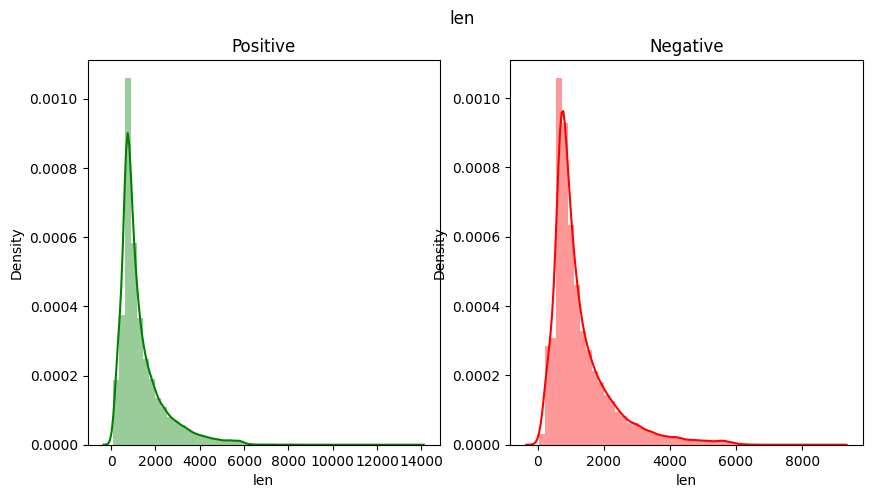

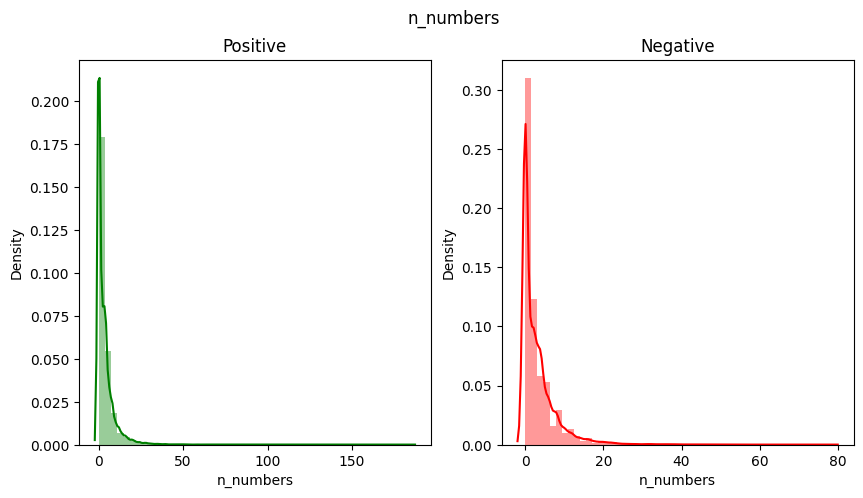

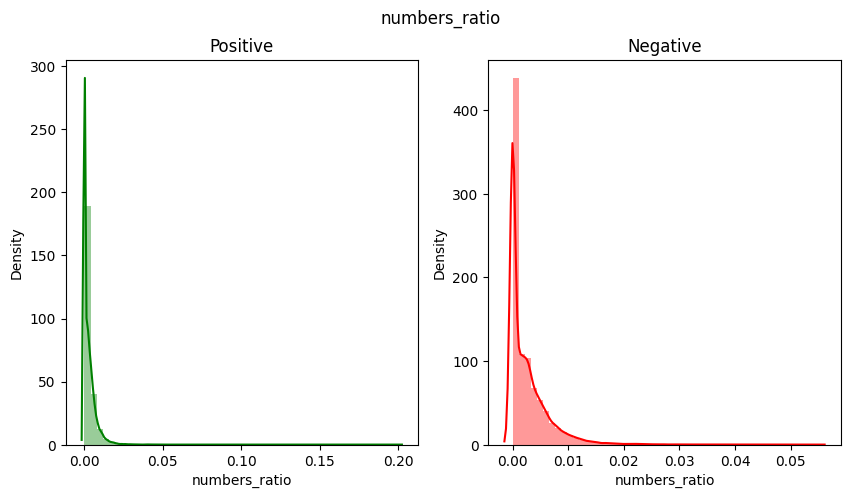

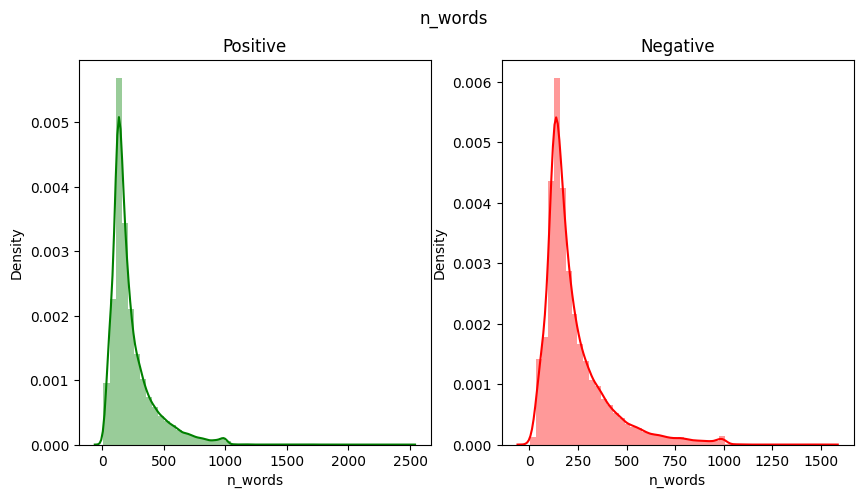

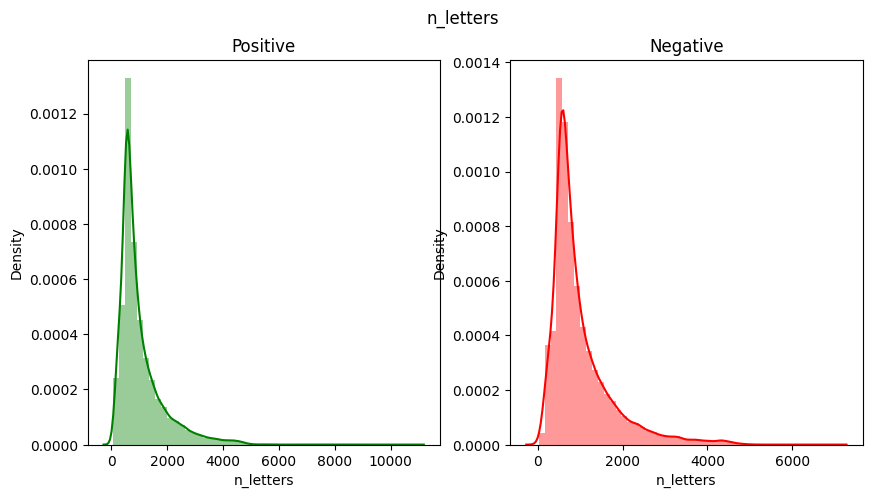

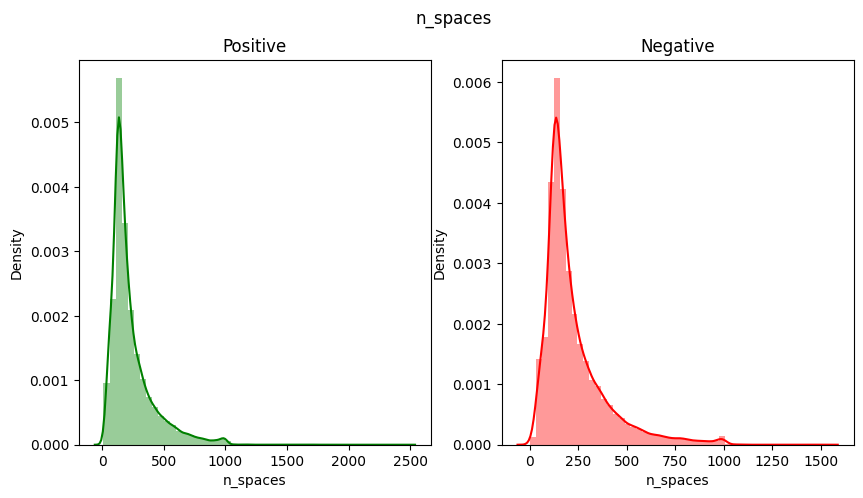

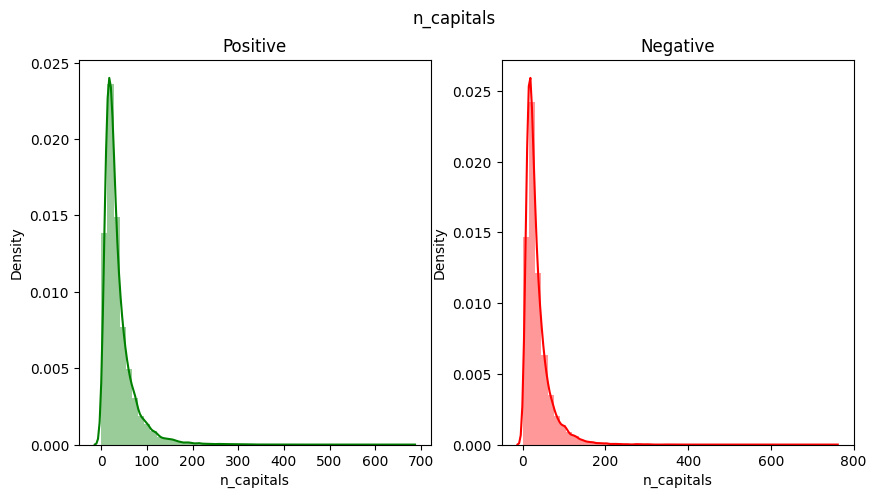

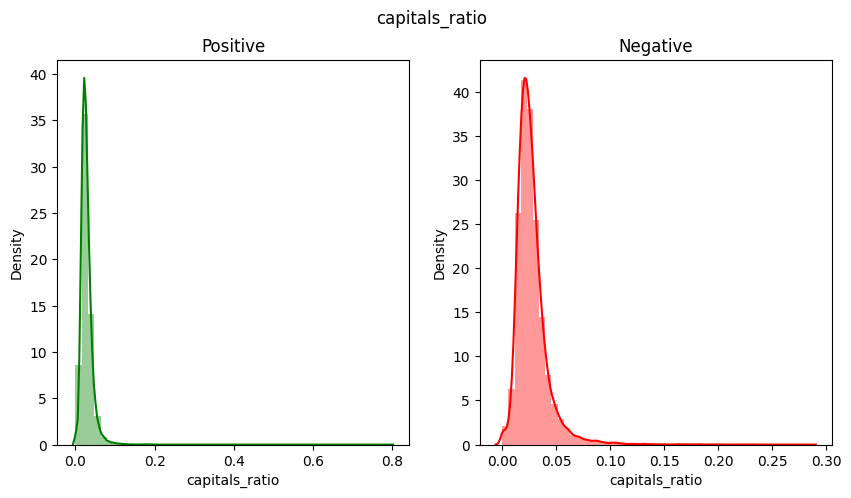

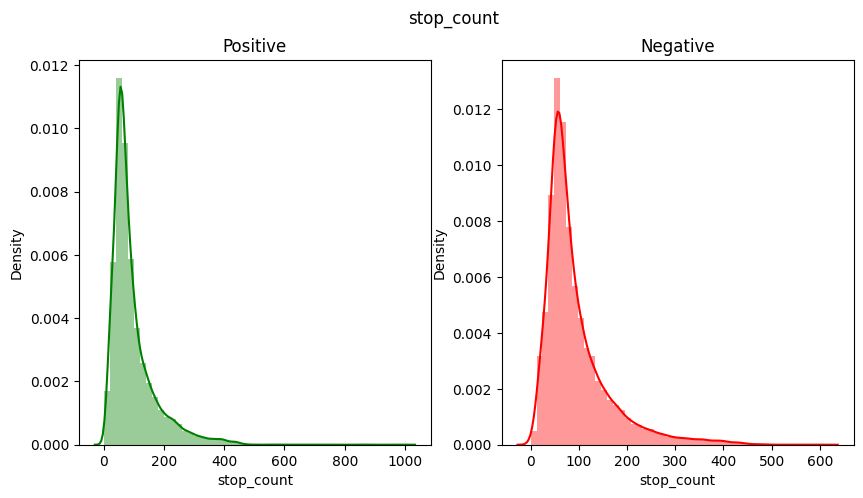

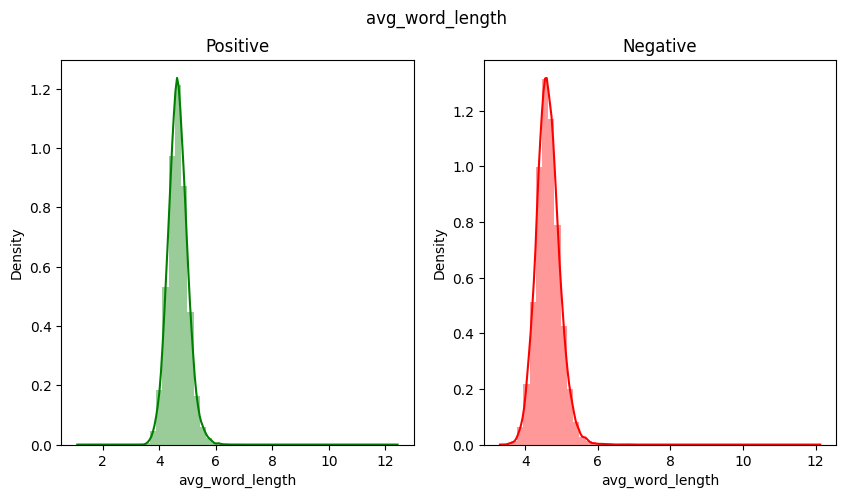

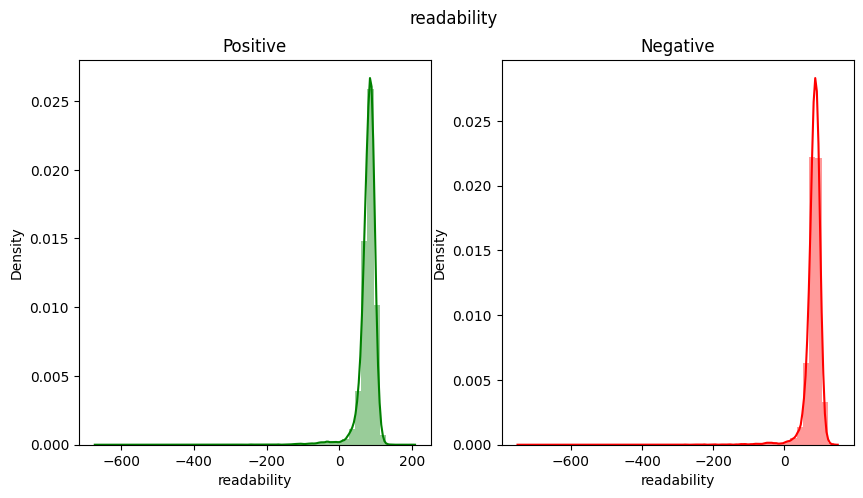

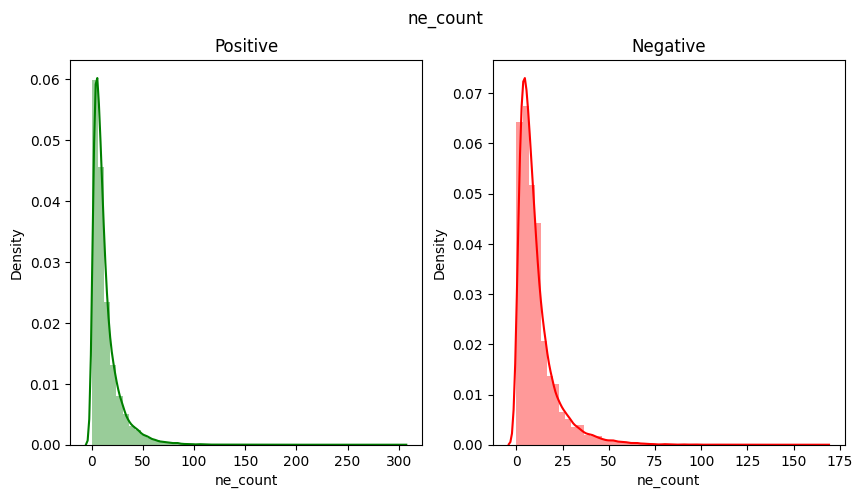

In [ ]:
for stat in stat_cols:
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[df.sentiment==True][stat], ax=ax1, color='green')
    ax1.set_title('Positive')
    sns.distplot(df[df.sentiment==False][stat], ax=ax2, color='red')
    ax2.set_title('Negative')
    fig.suptitle(stat)

We can see that some distribution are quite different which can indicate this features for the model

## Readability

I've tried two libs but they don't work so I put this piece of code:

In [ ]:
# Splits the text into sentences
def break_sentences(text):
	sents = sent_tokenize(text)
	return list(sents)

# Returns Number of Words in the text
def word_count(text):
	words = len(word_tokenize(text))
	return words

# Returns the number of sentences in the text
def sentence_count(text):
	sentences = break_sentences(text)
	return len(sentences)

# Returns average sentence length
def avg_sentence_length(text):
	words = word_count(text)
	sentences = sentence_count(text)
	average_sentence_length = float(words / sentences)
	return average_sentence_length

# Textstat is a python package, to calculate statistics from
# text to determine readability,
# complexity and grade level of a particular corpus.
# Package can be found at https://pypi.python.org/pypi/textstat
def syllables_count(word):
	return textstatistics().syllable_count(word)

# Returns the average number of syllables per
# word in the text
def avg_syllables_per_word(text):
	syllable = syllables_count(text)
	words = word_count(text)
	ASPW = float(syllable) / float(words)
	return round(ASPW, 1)

def flesch_reading_ease(text):
	"""
		Implements Flesch Formula:
		Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
		Here,
		ASL = average sentence length (number of words
				divided by number of sentences)
		ASW = average word length in syllables (number of syllables
				divided by number of words)
	"""
	FRE = 206.835 - float(1.015 * avg_sentence_length(text)) -\
		float(84.6 * avg_syllables_per_word(text))
	return round(FRE, 2)


In [ ]:
%%time
df['readability'] = df.review.apply(lambda text: flesch_reading_ease(text))

CPU times: user 3min 24s, sys: 667 ms, total: 3min 24s
Wall time: 3min 25s


In [ ]:
df.readability.describe()

count    49582.000000
mean        79.748606
std         26.873320
min       -739.500000
25%         73.070000
50%         83.800000
75%         92.800000
max        197.300000
Name: readability, dtype: float64

Interesting outliers:

In [ ]:
df[df.readability < -500]

,review,sentiment,raw,cleaned,tokens,len,n_numbers,numbers_ratio,n_words,n_letters,n_spaces,n_capitals,capitals_ratio,stop_count,avg_word_length,readability
7754,Posh Spice Victoria Beckham and her alleged ne...,False,posh spice victoria beckham and her alleged ne...,posh spice victoria bentham and her alleged ne...,"[posh, spice, victoria, bentham, her, alleged,...",4293,11,0.002562,669,3463,668,92,0.021430,275,5.418535,-739.50
15627,Since most review's of this film are of screen...,False,since most review's of this film are of screen...,since most review of this film be of screening...,"[since, most, review, film, screening, see, de...",3507,17,0.004847,571,2789,570,92,0.026233,221,5.143608,-588.94
29166,"I recommend families if possible,to show this ...",True,"i recommend families if possible,to show this ...","I recommend family if posible , to show this t...","[I, recommend, family, if, posible, ,, show, o...",3167,10,0.003158,548,2530,547,53,0.016735,242,4.781022,-527.03
30170,As for many on here I can't help but praise th...,True,as for many on here i can't help but praise th...,as for many on here I can not help but praise ...,"[as, many, on, here, I, can, not, help, but, p...",3476,10,0.002877,642,2702,641,126,0.036249,292,4.415888,-661.68


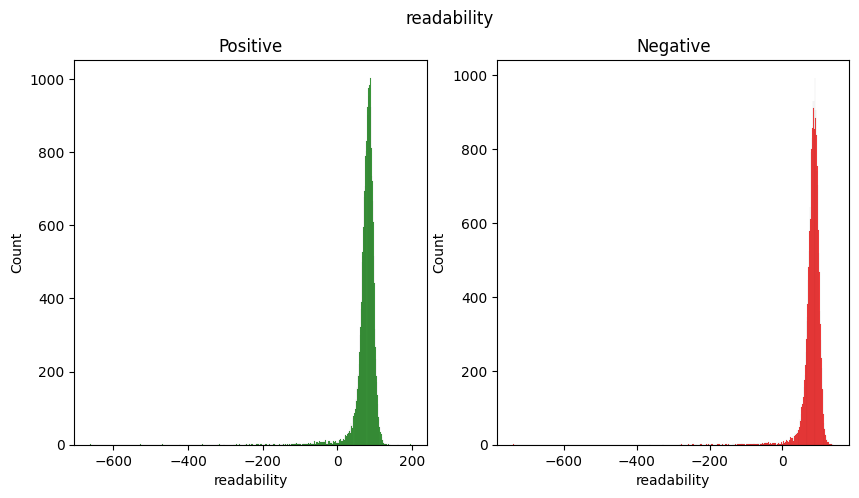

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df[df.sentiment == True]['readability'], ax=ax1, color='green')
ax1.set_title('Positive')
sns.histplot(df[df.sentiment == False]['readability'], ax=ax2, color='red')
ax2.set_title('Negative')
plt.suptitle('readability')
plt.show()

Distribution looks quite similar

## POS and NER

I think it would be interesting next time to extract feature sets such adjective and adverb, noun, verb and combination of adjective, adverb, noun and verb are extracted which are mostly sentiment bearing. Here I will make just one simple feature - the amount of NE.

In [ ]:
%%time
# Load the required model
nlp = spacy.load('en_core_web_sm')

# Create a Doc instance
df['ne_count'] = df.review.apply(lambda text: len(nlp(text).ents))

CPU times: user 34min 10s, sys: 4.58 s, total: 34min 14s
Wall time: 34min 24s


In [ ]:
df.ne_count.describe()

count    49582.000000
mean        11.997479
std         12.285451
min          0.000000
25%          4.000000
50%          8.000000
75%         15.000000
max        302.000000
Name: ne_count, dtype: float64

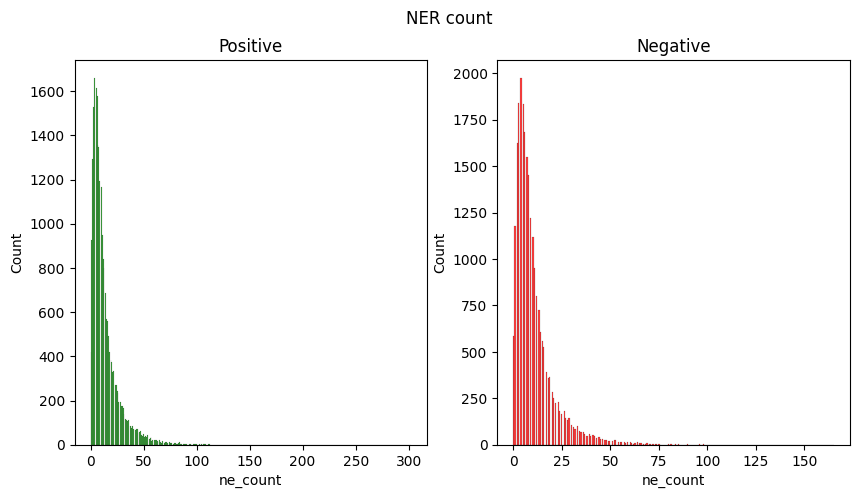

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df[df.sentiment==True]['ne_count'], ax=ax1, color='green')
ax1.set_title('Positive')
sns.histplot(df[df.sentiment==False]['ne_count'], ax=ax2, color='red')
ax2.set_title('Negative')
plt.suptitle('NER count')
plt.show()

We can see that positive class has more outliers.

## Final numeric features

In [ ]:
df.info()
stat_cols = df.select_dtypes(np.number).columns.tolist()
print(stat_cols)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           49582 non-null  object 
 1   sentiment        49582 non-null  bool   
 2   raw              49582 non-null  object 
 3   cleaned          49582 non-null  object 
 4   tokens           49582 non-null  object 
 5   len              49582 non-null  int64  
 6   n_numbers        49582 non-null  int64  
 7   numbers_ratio    49582 non-null  float64
 8   n_words          49582 non-null  int64  
 9   n_letters        49582 non-null  int64  
 10  n_spaces         49582 non-null  int64  
 11  n_capitals       49582 non-null  int64  
 12  capitals_ratio   49582 non-null  float64
 13  stop_count       49582 non-null  int64  
 14  avg_word_length  49582 non-null  float64
 15  readability      49582 non-null  float64
 16  ne_count         49582 non-null  int64  
dtypes: bool(1), 

# Saving/Loading the dataset

In [ ]:
import pickle
save_path = os.path.join(mydrive_url, 'NN4_HW')

isExist = os.path.exists(save_path)
if not isExist:

   os.makedirs(save_path)
   print("The new saving directory is created!")

#with open(os.path.join(save_path, 'df.pickle'), 'wb') as f:
#    pickle.dump(df, f)

df = pd.read_pickle(os.path.join(save_path, 'df.pickle'))

# Linear model

## Preprocessor pipeline

In [ ]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)

X = df.drop(['sentiment','raw','tokens','review'], axis=1)
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

X.columns

Index(['cleaned', 'len', 'n_numbers', 'numbers_ratio', 'n_words', 'n_letters',
       'n_spaces', 'n_capitals', 'capitals_ratio', 'stop_count',
       'avg_word_length', 'readability', 'ne_count'],
      dtype='object')

In [ ]:
print('Shape before the transformation:')
print(X_train.shape)
print(X_test.shape)


num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
])

text_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(
                        stop_words=stop_words,
                        ngram_range=(1,2))),
    ('scale', MaxAbsScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
      ('num', num_pipeline, stat_cols),
      ('text', text_pipeline, 'cleaned'),

])

pipeline = make_pipeline(
    preprocessor,
)

X_train_tr = pipeline.fit_transform(X_train, y_train)
X_test_tr = pipeline.transform(X_test)

print('Shape after the transformation:')
print(X_train_tr.shape)
print(X_test_tr.shape)

Shape before the transformation:
(34707, 13)
(14875, 13)
Shape after the transformation:
(34707, 2072663)
(14875, 2072663)


## Model evaluation func

In [ ]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, cv, svm=False):

  results = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=cv,
    scoring='roc_auc',
    return_train_score=True,
    error_score="raise",
  )

  ppl = pipeline.fit(X_train, y_train)


  if(svm):

    calibrator = CalibratedClassifierCV(pipeline, cv='prefit')
    model=calibrator.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probas = model.predict_proba(X_test)

  else:

    y_pred = pipeline.predict(X_test)
    y_probas = pipeline.predict_proba(X_test)

  train_score = results['train_score']
  val_score = results['test_score']

  print(f'\nTrain roc_auc: {train_score.mean():.3f}, Std: {train_score.std():.3f}')
  print(f'Validation roc_auc: {val_score.mean():.3f}, Std: {val_score.std():.3f}')
  print(f'Test roc_auc: {roc_auc_score(y_test, y_probas[:,1]):.3f}')

  print(classification_report(y_test, y_pred))

  import scikitplot as skplt
  skplt.metrics.plot_roc_curve(y_test, y_probas)
  plt.show()

  return pipeline

## Features funcs

In [ ]:
# Plot coefficients of words

def plot_coeffs(coef, feature_names_list, top_features=20):

  f, ax = plt.subplots(figsize=(13, 10))

  ax.set_title('Most important n-grams for classification', fontsize=20)
  coef = coef.ravel()
  top_positive_coefficients = np.argsort(coef)[-top_features:]
  top_negative_coefficients = np.argsort(coef)[:top_features]
  top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])


  colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
  ax.barh(np.arange(2 * top_features), coef[top_coefficients], color=colors)
  feature_names = np.array(feature_names_list)
  ax.set_yticks(np.arange(2 * top_features))
  ax.set_yticklabels(feature_names[top_coefficients], fontsize=13)
  plt.tight_layout()
  ax.yaxis.grid()
  plt.show()

In [ ]:
def plot_wordcloud(coef, feature_names_list, top_features=100):                # Plot wordclouds
  coef = coef.ravel()
  top_positive_coefficients = np.argsort(coef)[-top_features:]
  top_negative_coefficients = np.argsort(coef)[:top_features]
  feature_names = np.array(feature_names_list)

  fig = plt.figure(figsize=(13, 15), tight_layout=True)

  for i, features in enumerate(zip(
      [top_positive_coefficients, top_negative_coefficients],
      ['Top 50 positive n-grams \n', 'Top 50 negative n-grams \n']
      )):
    ax = fig.add_subplot(2,1,i+1)
    tags = feature_names[features[0]]
    for idx, tag in enumerate(tags):
        tags[idx] = tag.replace(' ', '_')
    ax.imshow(WordCloud(
        max_words=50,
        background_color="dimgray",
        width=1100,
        height=500,
        colormap='seismic').\
          generate(' '.join(tags)), interpolation='bilinear', alpha=0.9)
    ax.set_title(features[1], fontsize=25)
    ax.axis('off')

## Logreg


Train roc_auc: 1.000, Std: 0.000
Validation roc_auc: 0.962, Std: 0.001
Test roc_auc: 0.966
              precision    recall  f1-score   support

       False       0.92      0.89      0.90      7531
        True       0.89      0.92      0.90      7344

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



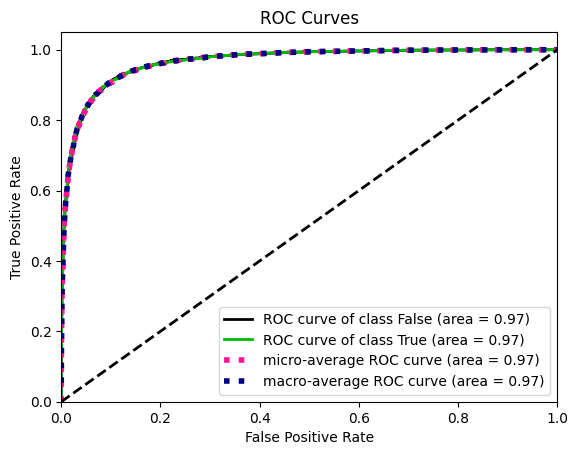

CPU times: user 5min 3s, sys: 1min 10s, total: 6min 14s
Wall time: 5min 4s


In [ ]:
%%time

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(penalty='l2', C=1))
])

lr_pipeline = evaluate_model(lr_pipeline, X_train, y_train, X_test, y_test, cv)

Fast and quite accurate

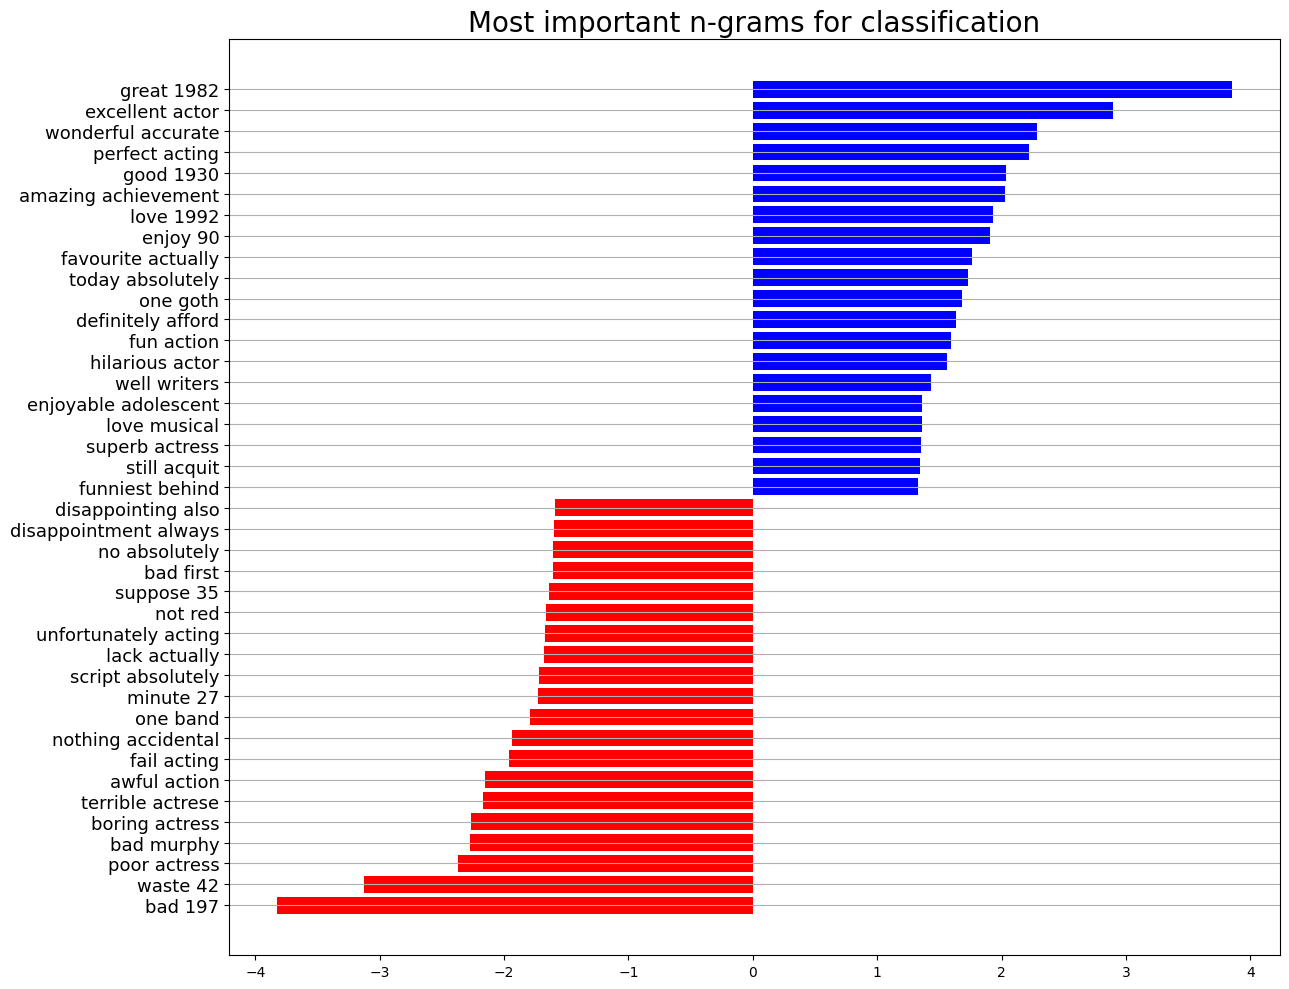

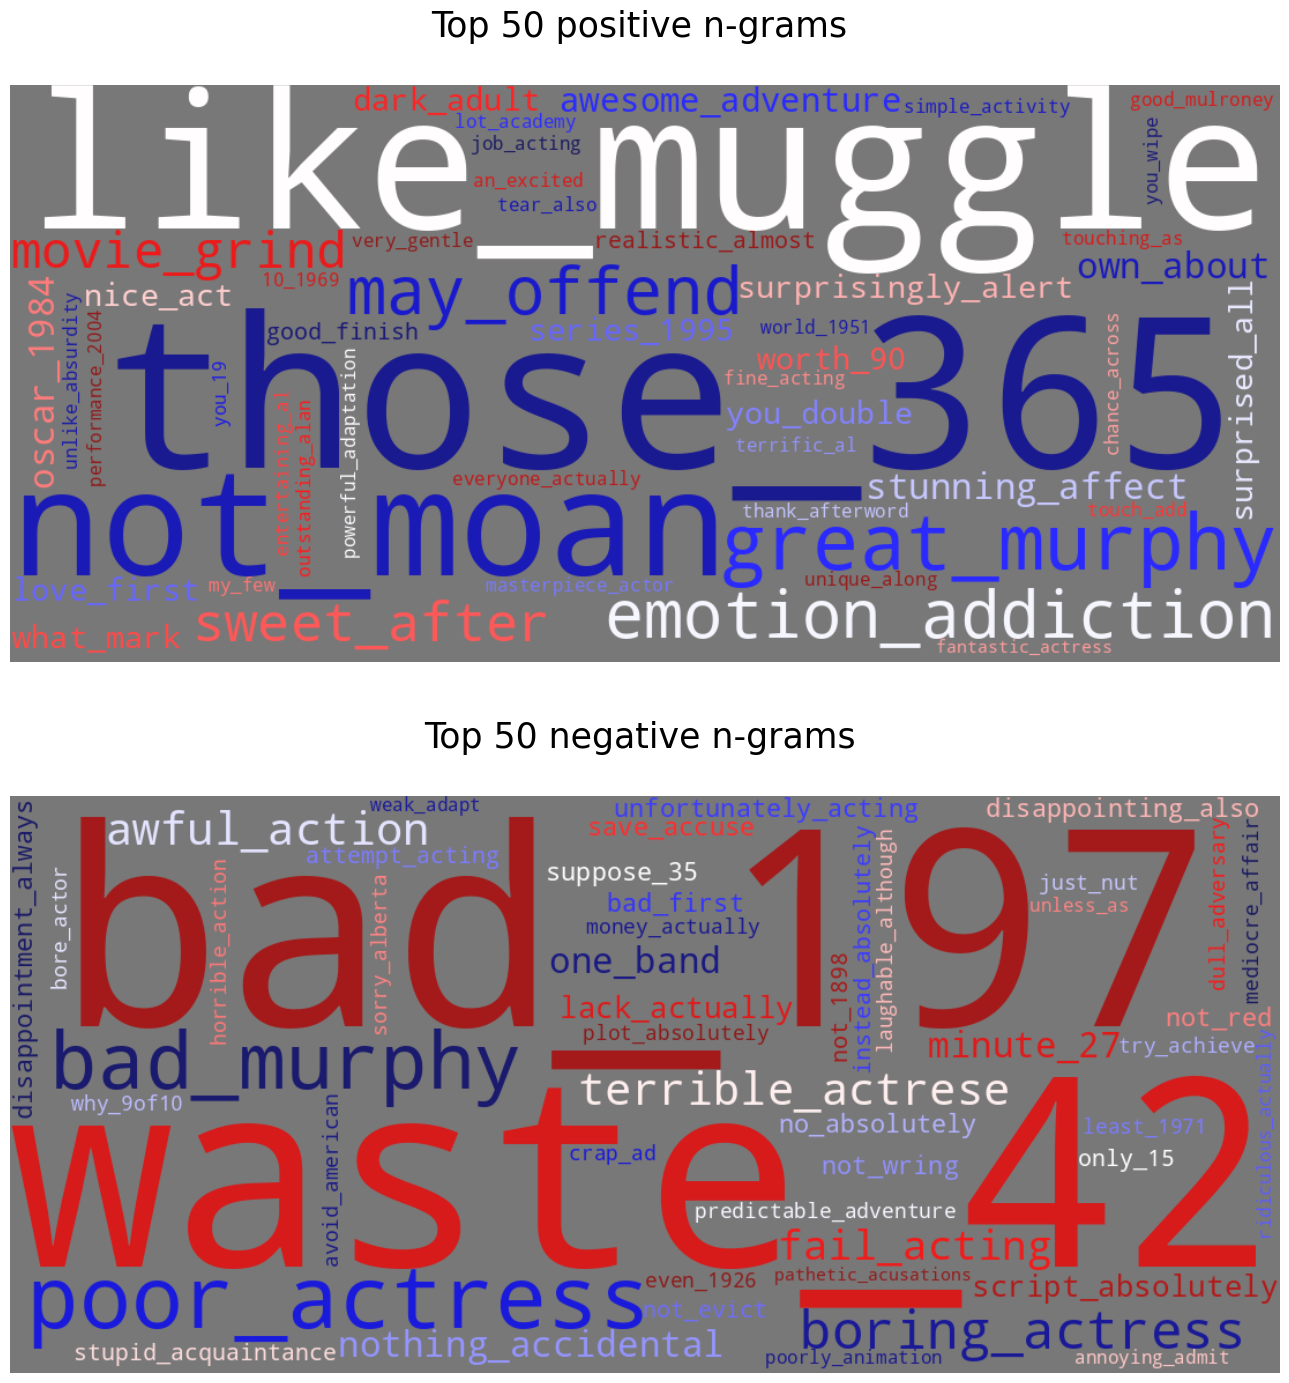

In [ ]:
plot_coeffs(lr_pipeline['model'].coef_,\
  lr_pipeline['preprocessor'].transformers_[1][1]['vectorizer'].\
  get_feature_names_out())

plot_wordcloud(lr_pipeline['model'].coef_,\
  lr_pipeline['preprocessor'].transformers_[1][1]['vectorizer'].\
  get_feature_names_out())

# NN

## Funcs

In [ ]:
def plot_hist(history, url=None, metric='accuracy'):

  acc = history.history[f'{metric}']
  val_acc = history.history[f'val_{metric}']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(loss))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  if url:
    plt.savefig(url, dpi=300)
  plt.show()

## Tokenization

In [ ]:
X = df['tokens']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    shuffle=True)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

#Tokenize the sentences
tokenizer = Tokenizer()

####!!! I know that it is a huge data leakage, but I need to calculate and save
# small embedding matrix to save memory for the learning.

####!!! Future update: tf.keras.layers.TextVectorization
tokenizer.fit_on_texts(X)

#converting text into integer sequences
x_tr_seq  = tokenizer.texts_to_sequences(X_train)
x_val_seq = tokenizer.texts_to_sequences(X_test)

#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=2000)
x_val_seq = pad_sequences(x_val_seq, maxlen=2000)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

122308


In [ ]:
x_tr_seq[:10]

## Word2Vec

Let's try simple model

In [ ]:
model = Word2Vec(df.tokens,
                 vector_size=64,      # embedding vector size
                 min_count=3,  # consider words that occured at least 5 times
                 window=5).wv  # define context as a 5-word window around the target word

In [ ]:
model.most_similar([model.get_vector('world') - model.get_vector('pollution') + model.get_vector('brain')])

[('world', 0.7440288066864014),
 ('brain', 0.733043372631073),
 ('mind', 0.6187200546264648),
 ('soul', 0.6146885752677917),
 ('enemy', 0.5807434916496277),
 ('being', 0.5796923041343689),
 ('life', 0.5760037302970886),
 ('existence', 0.5746119618415833),
 ('fear', 0.573046088218689),
 ('imagination', 0.5544633269309998)]

Because our vocabulary quite poor, the result is also not that great. Let's try some pre-trained models

## Pretrained FastText + LSTM

### Loading

Let's see what we can download using gensim

In [ ]:
info = api.info()

for model_name, model_data in sorted(info['models'].items()):
  print(
    '%s (%d records): %s' % (
      model_name,
      model_data.get('num_records', -1),
      model_data['description'][:100] + '...',
    )
  )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors of the movie matrix....
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings)...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (1...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets, 27B tokens, 1.2M vocab, uncased (https://nlp.stanford.edu/p...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https://nlp.stanford.edu/pr...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https://nlp.stanford.edu/pr...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https://nlp.stanford.edu/pr...
glove-wiki-giga

Let's download "fasttext-wiki-news-subwords-300" for the beginning

In [ ]:
model = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
#model.most_similar([model.get_vector('world') - model.get_vector('pollution') + model.get_vector('brain')])

[('brain', 0.79662024974823),
 ('world', 0.7204028964042664),
 ('brains', 0.6830400228500366),
 ('brain-mind', 0.6375347971916199),
 ('left-brain', 0.6270327568054199),
 ('forebrain', 0.6102624535560608),
 ('right-brain', 0.6082836389541626),
 ('brain-to-brain', 0.6014016270637512),
 ('cerebrum', 0.6000599265098572),
 ('mind-brain', 0.5993502140045166)]

### Embedding matrix

In [ ]:
# Get embedding matrix

embedding_matrix = np.zeros((vocab_size, model.vector_size))
for word, i in tokenizer.word_index.items():
    try:
      embedding_vector = model.get_vector(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    except KeyError:
      continue

embedding_matrix.shape

In [ ]:
#with open(os.path.join(save_path, 'embedding_matrix.pickle'), 'wb') as f:
#    pickle.dump(embedding_matrix, f)


embedding_matrix = pd.read_pickle(os.path.join(save_path, 'embedding_matrix.pickle'))

### Model

In [ ]:
with tpu_strategy.scope():
  nn_model = tf.keras.models.Sequential([
    # Define Keras Embedding layer
    tf.keras.layers.Embedding(
        embedding_matrix.shape[0],
        300, #model.vector_size,
        weights=[embedding_matrix],
        trainable=False
      ),

    #lstm layer
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.5)
      ),

    #Global Maxpooling
    tf.keras.layers.GlobalMaxPooling1D(),

    #Dense Layer
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),

    tf.keras.layers.Dense(1,activation='sigmoid'),

  ])
  #Add loss function, metrics, optimizer
  nn_model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=["accuracy"])

  #Print summary of model
  print(nn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         36692400  
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        439296    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 37,164,721
Trainable params: 472,321
Non-t

### Callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=15)

checkpoint_path = os.path.join(save_path, "model_1/cp.ckpt")

local_device_option = tf.train.CheckpointOptions(experimental_io_device="/job:localhost")

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    options=local_device_option,
  )



### Learning

In [ ]:
history = nn_model.fit(
    x_tr_seq,
    np.array(y_train),
    batch_size=batch_size,
    epochs=40,
    validation_data=(x_val_seq, np.array(y_test)),
    verbose=1,
    callbacks=[early_stopping, cp_callback]
  )

with open(os.path.join(save_path, 'history.pickle'), 'wb') as f:
    pickle.dump(history, f)

Epoch 1/40
543/543 [==============================] - ETA: 0s - loss: 0.7561 - accuracy: 0.6546
Epoch 1: val_accuracy improved from -inf to 0.80437, saving model to /content/gdrive/MyDrive/NN4_HW/model_1/cp.ckpt
543/543 [==============================] - 156s 265ms/step - loss: 0.7561 - accuracy: 0.6546 - val_loss: 0.4807 - val_accuracy: 0.8044
Epoch 2/40
543/543 [==============================] - ETA: 0s - loss: 0.4508 - accuracy: 0.8048
Epoch 2: val_accuracy improved from 0.80437 to 0.83368, saving model to /content/gdrive/MyDrive/NN4_HW/model_1/cp.ckpt
543/543 [==============================] - 133s 245ms/step - loss: 0.4508 - accuracy: 0.8048 - val_loss: 0.3890 - val_accuracy: 0.8337
Epoch 3/40
543/543 [==============================] - ETA: 0s - loss: 0.3993 - accuracy: 0.8306
Epoch 3: val_accuracy improved from 0.83368 to 0.83657, saving model to /content/gdrive/MyDrive/NN4_HW/model_1/cp.ckpt
543/543 [==============================] - 132s 244ms/step - loss: 0.3993 - accuracy: 0.

### Learning curve

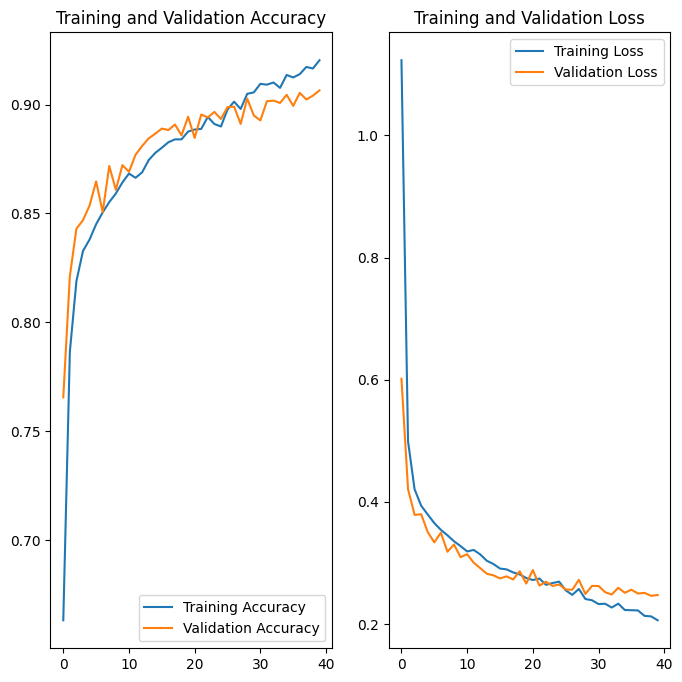

In [ ]:
history = pd.read_pickle(os.path.join(save_path, 'history.pickle'))
plot_hist(history=history)

## Pretraned GloVe + CNN

### Loading

Let's try now "glove-twitter-200"

In [ ]:
model = api.load('glove-twitter-200')

[=================================================-] 99.2% 752.8/758.5MB downloaded


### Embedding matrix

In [ ]:
# Get embedding matrix

embedding_matrix_2 = np.zeros((vocab_size, model.vector_size))
for word, i in tokenizer.word_index.items():
    try:
      embedding_vector = model.get_vector(word)
      if embedding_vector is not None:
        embedding_matrix_2[i] = embedding_vector
    except KeyError:
      continue

with open(os.path.join(save_path, 'embedding_matrix_2.pickle'), 'wb') as f:
    pickle.dump(embedding_matrix_2, f)

In [ ]:
embedding_matrix_2 = pd.read_pickle(os.path.join(save_path, 'embedding_matrix_2.pickle'))

### Model

Let's try a slightly different archtecture this time. GPT advised to try LeNet-5 when I asked something for extremely limited resources =)

In [ ]:
with tpu_strategy.scope():
  nn_model_2 = tf.keras.models.Sequential([
    # Define Keras Embedding layer
    tf.keras.layers.Embedding(
        embedding_matrix_2.shape[0],
        200, #model.vector_size,
        weights=[embedding_matrix_2],
        trainable=False
      ),

    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv1D(16, 5, activation='relu'),

    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Conv1D(32, 5, activation='relu'),

    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.GlobalMaxPooling1D(),

    #Dense Layers
    tf.keras.layers.Dense(120, activation='relu', kernel_regularizer='l2'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(84, activation='relu', kernel_regularizer='l2'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid'),

  ])
  #Add loss function, metrics, optimizer
  nn_model_2.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=["accuracy"])

  #Print summary of model
  print(nn_model_2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 200)         24461600  
                                                                 
 dropout_4 (Dropout)         (None, None, 200)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 16)          16016     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 16)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, None, 32)          2592      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 32)         0         
 1D)                                                  

### Callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=10)

checkpoint_path = os.path.join(save_path, "model_2/cp.ckpt")

local_device_option = tf.train.CheckpointOptions(experimental_io_device="/job:localhost")

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    options=local_device_option,
  )

### Learning

In [ ]:
history_2 = nn_model_2.fit(
    x_tr_seq,
    np.array(y_train),
    batch_size=batch_size,
    epochs=40,
    validation_data=(np.array(x_val_seq), np.array(y_test)),
    verbose=1,
    callbacks=[early_stopping]
  )

with open(os.path.join(save_path, 'history_2.pickle'), 'wb') as f:
    pickle.dump(history_2, f)

Epoch 1/40
136/136 [==============================] - 11s 73ms/step - loss: 0.2942 - accuracy: 0.8856 - val_loss: 0.3161 - val_accuracy: 0.8754
Epoch 2/40
136/136 [==============================] - 7s 51ms/step - loss: 0.2832 - accuracy: 0.8896 - val_loss: 0.3146 - val_accuracy: 0.8743
Epoch 3/40
136/136 [==============================] - 5s 40ms/step - loss: 0.2852 - accuracy: 0.8895 - val_loss: 0.3135 - val_accuracy: 0.8742
Epoch 4/40
136/136 [==============================] - 5s 38ms/step - loss: 0.2790 - accuracy: 0.8936 - val_loss: 0.3127 - val_accuracy: 0.8736
Epoch 5/40
136/136 [==============================] - 5s 33ms/step - loss: 0.2796 - accuracy: 0.8911 - val_loss: 0.3082 - val_accuracy: 0.8744
Epoch 6/40
136/136 [==============================] - 5s 33ms/step - loss: 0.2769 - accuracy: 0.8895 - val_loss: 0.3165 - val_accuracy: 0.8748
Epoch 7/40
136/136 [==============================] - 5s 36ms/step - loss: 0.2786 - accuracy: 0.8906 - val_loss: 0.3083 - val_accuracy: 0.874

### Learning curve

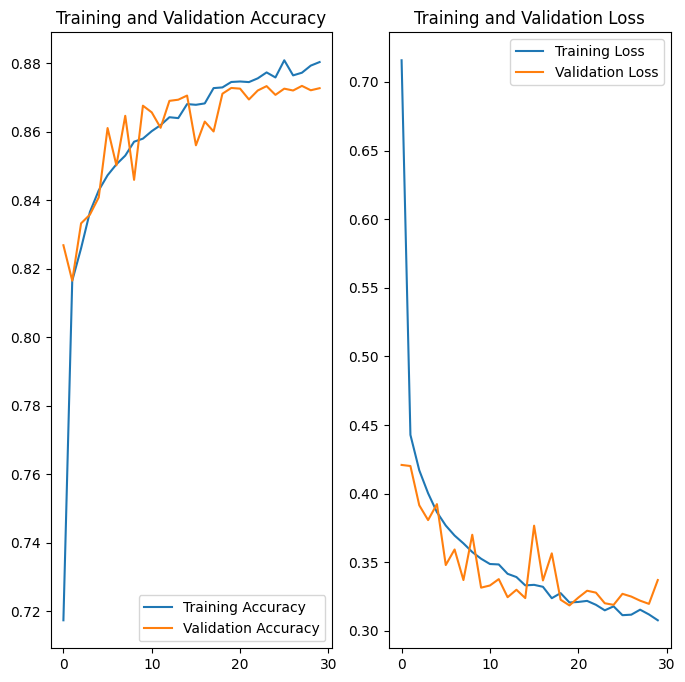

In [ ]:
history_2 = pd.read_pickle(os.path.join(save_path, 'history_2.pickle'))

plot_hist(history=history_2)

Fast and simple CNN gave 87% accuracy. Lets try pre-trained model

## BERT

I really want to try out Roberta, but it doesn't fit into memory here, the largest model I was able to download was BERT medium.

### Train-test split

In [ ]:
df = df.sample(frac=1)
dataset=tf.data.Dataset.from_tensor_slices((df.cleaned, df.sentiment)) #Create a tensorflow dataset

#train test split, we use 25% of the data for validation
val_data_size=int(0.25 * df.sentiment.shape[0])
val_ds=dataset.take(val_data_size).batch(batch_size, drop_remainder=True)
train_ds=dataset.skip(val_data_size).batch(batch_size, drop_remainder=True)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

### Model

In [ ]:
with tpu_strategy.scope():

  classifier = keras_nlp.models.DistilBertClassifier.from_preset(
      'distil_bert_base_en_uncased',
      dropout=0.2,
      num_classes=2,
  )

265570304/265570304 [==============================] - 3s 0us/step


### Learning

In [ ]:
history_3 = classifier.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

with open(os.path.join(save_path, 'history_3.pickle'), 'wb') as f:
    pickle.dump(history_3, f)

Epoch 1/5
581/581 [==============================] - 149s 171ms/step - loss: 0.2615 - sparse_categorical_accuracy: 0.8933 - val_loss: 0.1951 - val_sparse_categorical_accuracy: 0.9232
Epoch 2/5
581/581 [==============================] - 93s 160ms/step - loss: 0.1520 - sparse_categorical_accuracy: 0.9443 - val_loss: 0.2136 - val_sparse_categorical_accuracy: 0.9276
Epoch 3/5
581/581 [==============================] - 100s 172ms/step - loss: 0.0983 - sparse_categorical_accuracy: 0.9658 - val_loss: 0.3017 - val_sparse_categorical_accuracy: 0.9080
Epoch 4/5
581/581 [==============================] - 92s 159ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.2683 - val_sparse_categorical_accuracy: 0.9233
Epoch 5/5
581/581 [==============================] - 92s 159ms/step - loss: 0.0428 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.3574 - val_sparse_categorical_accuracy: 0.9085


In [ ]:
checkpoint_path = os.path.join(save_path, 'final_model')

checkpoint = tf.train.Checkpoint(model=classifier)
local_device_option = tf.train.CheckpointOptions(experimental_io_device="/job:localhost")
checkpoint.write(checkpoint_path, options=local_device_option)

'/content/gdrive/MyDrive/NN4_HW/final_model'

### Learning curve

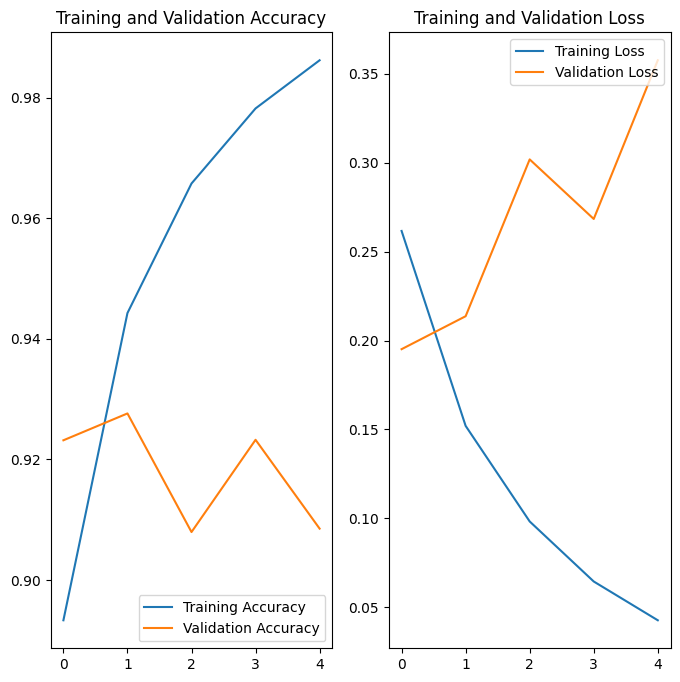

In [ ]:
#history_3 = pd.read_pickle(os.path.join(save_path, 'history_3.pickle'))

plot_hist(history=history_3, metric='sparse_categorical_accuracy')

The best result in almost no time, but very quickli starts to overfit, I would love to change dropuot percent or try a different model, but colab doesn't give me TPU today and I don't have time left

# Conclusion

The best and fastest result gave transfer learning, but simple LogisticRegression was also quite good. I also want to try transformers next time.   

## Word imortance

TPU was unavailable today =(
  
   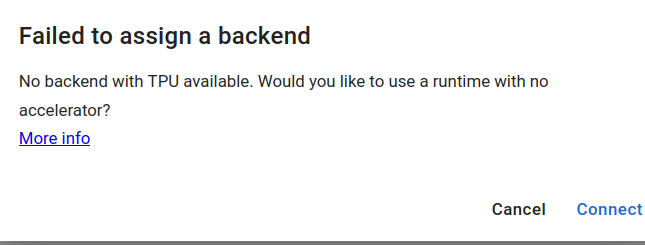

### Shap

I tried to use this example: https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Keras%20LSTM%20for%20IMDB%20Sentiment%20Classification.html


In [ ]:
nn_model_2 = tf.keras.models.Sequential([
  # Define Keras Embedding layer
  tf.keras.layers.Embedding(
      embedding_matrix_2.shape[0],
      200, #model.vector_size,
      weights=[embedding_matrix_2],
      trainable=False
    ),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv1D(6, 5, activation='relu'),

  tf.keras.layers.MaxPooling1D(2),

  tf.keras.layers.Conv1D(16, 5, activation='relu'),

  tf.keras.layers.MaxPooling1D(2),

  tf.keras.layers.GlobalMaxPooling1D(),

  #Dense Layers
  tf.keras.layers.Dense(120, activation='relu', kernel_regularizer='l2'),

  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(84, activation='relu', kernel_regularizer='l2'),

  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(1, activation='sigmoid'),

])
#Add loss function, metrics, optimizer
nn_model_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"])

nn_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 200)         24461600  
                                                                 
 dropout_23 (Dropout)        (None, None, 200)         0         
                                                                 
 conv1d_16 (Conv1D)          (None, None, 6)           6006      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, None, 6)          0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, None, 16)          496       
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, None, 16)         0         
 g1D)                                                 

In [ ]:
nn_model_2.load_weights(os.path.join(save_path, "model_2/cp-0018.ckpt"))

In [ ]:
!pip install shap

In [ ]:
import shap
explainer = shap.DeepExplainer(nn_model_2, x_tr_seq[:100])

In [ ]:
shap_values = explainer.shap_values(x_val_seq[:10])

TypeError: ignored

### LIME

In [ ]:
nn_model = tf.keras.models.Sequential([
  # Define Keras Embedding layer
  tf.keras.layers.Embedding(
      embedding_matrix.shape[0],
      300,
      weights=[embedding_matrix],
      trainable=False
    ),

  #lstm layer
  tf.keras.layers.Bidirectional(
      tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.5)
    ),

  #Global Maxpooling
  tf.keras.layers.GlobalMaxPooling1D(),

  #Dense Layer
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),

  tf.keras.layers.Dense(1,activation='sigmoid'),

])
#Add loss function, metrics, optimizer
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"])

In [ ]:
nn_model.load_weights(os.path.join(save_path, "model_1/cp.ckpt"))

In [ ]:
!pip install lime

In [ ]:
from lime.lime_text import LimeTextExplainer
class_names=['negative','positive']
explainer= LimeTextExplainer(class_names=class_names)

In [ ]:
def predict_proba(x):
  testing_sequences = tokenizer.texts_to_sequences(x)
  testing_padded = pad_sequences(testing_sequences, maxlen=2000)
  pred = nn_model.predict(testing_padded)

  format_pred = np.concatenate([1.0-pred, pred], axis=1)

  return format_pred


In [ ]:
explainer.explain_instance(df.cleaned[666], predict_proba).show_in_notebook(text=True)

157/157 [==============================] - 498s 3s/step
